<a href="https://colab.research.google.com/github/Antika20/Sumbssion-Pengembang-Machine-Learning/blob/main/Submission_NPL_Tanpa_Cleansing_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antikaorinda","key":"4eff175b8f61192de087d150bebd4735"}'}

In [3]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d hgultekin/bbcnewsarchive

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 113MB/s]


In [5]:
from zipfile import ZipFile
file_name = "/content/bbcnewsarchive.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [6]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/bbc-news-data.csv', sep='\t')
df.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [7]:
# data columns
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

In [8]:
# total data
df.shape

(2225, 4)

In [9]:
# categories
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [10]:
df.isnull()

,category,filename,title,content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2220,False,False,False,False
2221,False,False,False,False
2222,False,False,False,False
2223,False,False,False,False


In [11]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

In [12]:
#Total Number of Missing NA
df.isnull().sum().sum()

0

In [13]:
# delete columns (unused column)
df_new = df.drop(columns=['filename'])
df_new

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [18]:
# One-hot encoding

categorynews = pd.get_dummies(df.category)
df_News = pd.concat([df, categorynews], axis=1)
df_News = df_News.drop(columns='category')
df_News

,filename,title,content,business,entertainment,politics,sport,tech
0,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2220,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,399.txt,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


In [19]:
textNews = df_News['title'].values + '' + df_News['content'].values
labelNews = df_News[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [21]:
textNews

array(['Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [22]:
labelNews

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [23]:
from sklearn.model_selection import train_test_split
textNews_latih, textNews_test, labelNews_latih, labelNews_test = train_test_split(textNews, labelNews, test_size=0.2)

In [24]:
# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words= 5000, oov_token='x')
tokenizer.fit_on_texts(textNews_latih) 
tokenizer.fit_on_texts(textNews_test)
 
sekuens_train = tokenizer.texts_to_sequences(textNews_latih)
sekuens_test = tokenizer.texts_to_sequences(textNews_test)
 
padded_latih = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [25]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1

In [26]:
# callback
class NewsCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\nHentikan Trainingnya Sekarang , sudah melewati batas  > 90%!")
callbacks = NewsCallback()

In [27]:
num_epochs = 30
history = model.fit(padded_latih, labelNews_latih, epochs=num_epochs, 
                    validation_data=(padded_test, labelNews_test), verbose=1,callbacks=[callbacks])

Epoch 1/30
56/56 [==============================] - 342s 6s/step - loss: 1.6068 - accuracy: 0.2253 - val_loss: 1.5961 - val_accuracy: 0.3213
Epoch 2/30
56/56 [==============================] - 338s 6s/step - loss: 1.5587 - accuracy: 0.3028 - val_loss: 1.5038 - val_accuracy: 0.3348
Epoch 3/30
56/56 [==============================] - 338s 6s/step - loss: 1.3082 - accuracy: 0.3764 - val_loss: 1.1440 - val_accuracy: 0.4494
Epoch 4/30
56/56 [==============================] - 340s 6s/step - loss: 1.1186 - accuracy: 0.4579 - val_loss: 1.2257 - val_accuracy: 0.4202
Epoch 5/30
56/56 [==============================] - 338s 6s/step - loss: 1.1147 - accuracy: 0.5112 - val_loss: 1.1333 - val_accuracy: 0.5843
Epoch 6/30
56/56 [==============================] - 338s 6s/step - loss: 0.8040 - accuracy: 0.6742 - val_loss: 0.7402 - val_accuracy: 0.7348
Epoch 7/30
56/56 [==============================] - 338s 6s/step - loss: 0.6061 - accuracy: 0.7848 - val_loss: 0.9704 - val_accuracy: 0.6809
Epoch 8/30
56

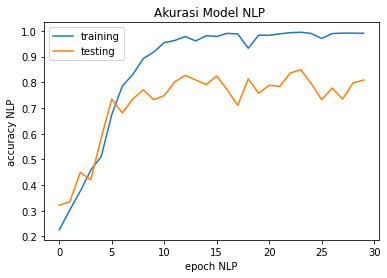

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model NLP ')
plt.ylabel('accuracy NLP')
plt.xlabel('epoch NLP')
plt.legend(['training', 'testing'], loc='upper left')
plt.show()

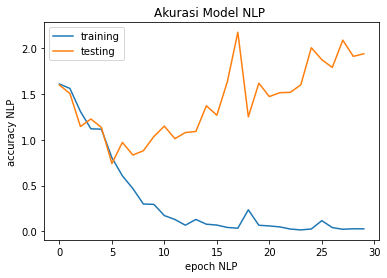

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Akurasi Model NLP ')
plt.ylabel('accuracy NLP')
plt.xlabel('epoch NLP')
plt.legend(['training', 'testing'], loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Defining list with labels
labels = ['bussiness','entertaiment','politics','sport','tech']


# Check point
# Showing labels
print(labels)

['bussiness', 'entertaiment', 'politics', 'sport', 'tech']


In [32]:
# Generating Numpy array with True classes' indexes
y_true = np.random.randint(low=0, high=5, size=100, dtype=int)


# Check point
# Shwoing array
print(y_true)

[2 3 4 2 1 1 2 0 0 2 1 4 0 3 4 2 3 0 0 4 3 4 1 2 0 0 0 4 4 4 0 0 4 4 2 0 3
 0 1 2 4 4 0 4 1 3 3 4 2 3 2 4 4 1 1 3 2 4 3 4 4 0 0 4 3 4 0 2 0 1 3 1 4 0
 0 2 4 2 2 4 4 4 0 3 0 1 1 3 0 1 4 1 1 2 0 2 4 3 3 4]


In [33]:
# Calculating number of samples for every class
# Iterating all classes' indexes in 'y_true' array
# Using Numpy function 'unique'
# Returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)


# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

classes indexes: [0 1 2 3 4]


classes frequency: [23 15 17 16 29]


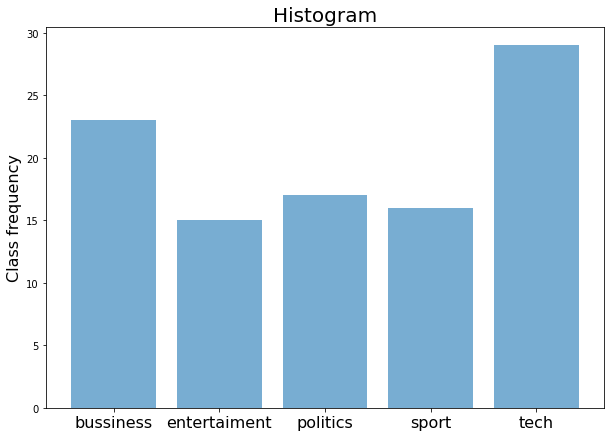

In [34]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 7.0)


# Plotting histogram of 3 classes with their number of samples
# Defining a figure object 
figure = plt.figure()

# Plotting Bar chart
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.6)


# Giving name to Y axis
plt.ylabel('Class frequency', fontsize=16)


# Giving names to every Bar along X axis
plt.xticks(classesIndexes, labels, fontsize=16)


# Giving name to the plot
plt.title('Histogram', fontsize=20)


# Saving the plot
figure.savefig('histogram.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [35]:
# Making copy of array with True classes' indexes
y_predicted = np.copy(y_true)

In [36]:
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)


# Check point
# Showing chosen indexes
print(ii)

[80 50 28 92 18 38 39 43  1 94 10 15 26 28 44 57 57 40 35 43 33 13 20 81
 64]


In [37]:
# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    # Generating new class index
    y_predicted[i] = np.random.randint(low=0, high=3, dtype=int)
    
    
    # Check point
    # Showing difference between True classes' indexes and Predicted ones
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

index = 80, True class => 4, 1 <= Predicted class
index = 50, True class => 2, 1 <= Predicted class
index = 28, True class => 4, 0 <= Predicted class
index = 92, True class => 1, 2 <= Predicted class
index = 18, True class => 0, 2 <= Predicted class
index = 38, True class => 1, 1 <= Predicted class
index = 39, True class => 2, 2 <= Predicted class
index = 43, True class => 4, 1 <= Predicted class
index =  1, True class => 3, 1 <= Predicted class
index = 94, True class => 0, 0 <= Predicted class
index = 10, True class => 1, 0 <= Predicted class
index = 15, True class => 2, 0 <= Predicted class
index = 26, True class => 0, 1 <= Predicted class
index = 28, True class => 4, 0 <= Predicted class
index = 44, True class => 1, 0 <= Predicted class
index = 57, True class => 4, 1 <= Predicted class
index = 57, True class => 4, 0 <= Predicted class
index = 40, True class => 4, 2 <= Predicted class
index = 35, True class => 0, 2 <= Predicted class
index = 43, True class => 4, 2 <= Predicted class


In [38]:
# Confusion Matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual, True class
# Each column represents a number of predicted class


# Computing Confusion Matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_true, y_predicted)

# Showing Confusion Matrix in form of 2D Numpy array
print(c_m)

[[20  1  2  0  0]
 [ 2 12  1  0  0]
 [ 1  1 15  0  0]
 [ 1  2  1 12  0]
 [ 2  2  3  0 22]]


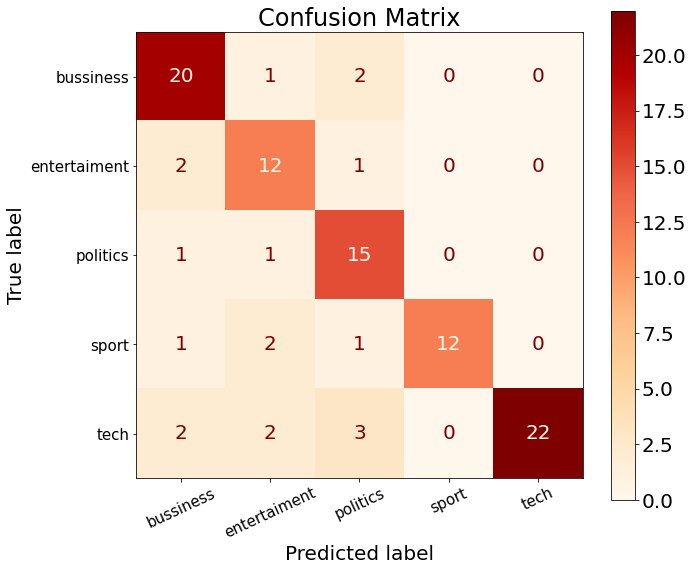

In [39]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()

In [40]:
# Showing the main classification metrics
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.67      0.80      0.73        15
           2       0.68      0.88      0.77        17
           3       1.00      0.75      0.86        16
           4       1.00      0.76      0.86        29

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.84      0.81      0.81       100

